# Compare SnowMIP forcing files

- Morin et al. (2012): https://doi.pangaea.de/10.1594/PANGAEA.774249 (Downloaded: 15/11/2023) -> `/home/lalandmi/Dropbox/data/SnowMIP`
- Krinner et al. (2018): https://gmd.copernicus.org/articles/11/5027/2018/ (data: https://www.geos.ed.ac.uk/~ressery/ESM-SnowMIP/netcdf.zip) -> `/home/lalandmi/Dropbox/data/SnowMIP/forcing`
- Menard et al. (2019) : https://essd.copernicus.org/articles/11/865/2019/ (data: https://doi.org/10.1594/PANGAEA.897575; downloaded: 22/11/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all`
- Lejeune et al. (2029): https://essd.copernicus.org/articles/11/71/2019/ (data: https://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html; dowloaded: 08/12/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP`

In [1]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar

In [2]:
path_morin2012 = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'
path_krinner2018 = '/home/lalandmi/Dropbox/data/SnowMIP/forcing'
path_menard2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/'
path_lejeune2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

## Check the Col de Porte site

In [17]:
df_morin2012 = pd.read_csv(path_morin2012+'/CDP_met_insitu.tab', skiprows=24, delimiter='\t', index_col=0)
df_morin2012.index = pd.to_datetime(df_morin2012.index)
ds_morin2012 = df_morin2012.to_xarray()
ds_morin2012 = ds_morin2012.rename({'Date/Time': 'time'})
ds_morin2012.load()

<xarray.Dataset>
Dimensions:               (time: 103995)
Coordinates:
  * time                  (time) datetime64[ns] 1993-11-10 ... 2011-06-12
Data variables:
    TTT [°C]              (time) float64 0.66 0.11 0.13 -0.52 ... 5.9 5.39 4.41
    Humidity spec [g/kg]  (time) float64 4.486 4.266 4.317 ... 5.969 5.826 5.621
    ff [m/s]              (time) float64 0.1 0.5 0.4 0.2 0.1 ... 2.1 1.4 1.4 1.4
    Rain [kg/m**2/s]      (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snow [kg/m**2/s]      (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    LWD [W/m**2]          (time) float64 295.8 259.4 265.6 ... 286.1 274.2 264.4
    DIR [W/m**2]          (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    DIF [W/m**2]          (time) float64 0.278 0.0 0.0 0.278 ... 0.0 0.0 0.0 0.0
    PoPoPoPo [hPa]        (time) float64 872.6 872.1 871.9 ... 872.2 872.1 871.9

In [18]:
ds_krinner2018 = xr.open_dataset(path_krinner2018+'/met_insitu_cdp_1994_2014.nc').load()
ds_menard2019 = xr.open_dataset(path_menard2019+'/met_insitu_cdp_1994_2014.nc').load()
ds_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.MetInsitu.nc').load()

### SWDown
- Morin = lejeune sauf en 1995 et 1997 (diff de 400W)
- Menard = morin (sauf comme au-dessus)
- Aucune différence pendant les saisons de neige sauf en 2008

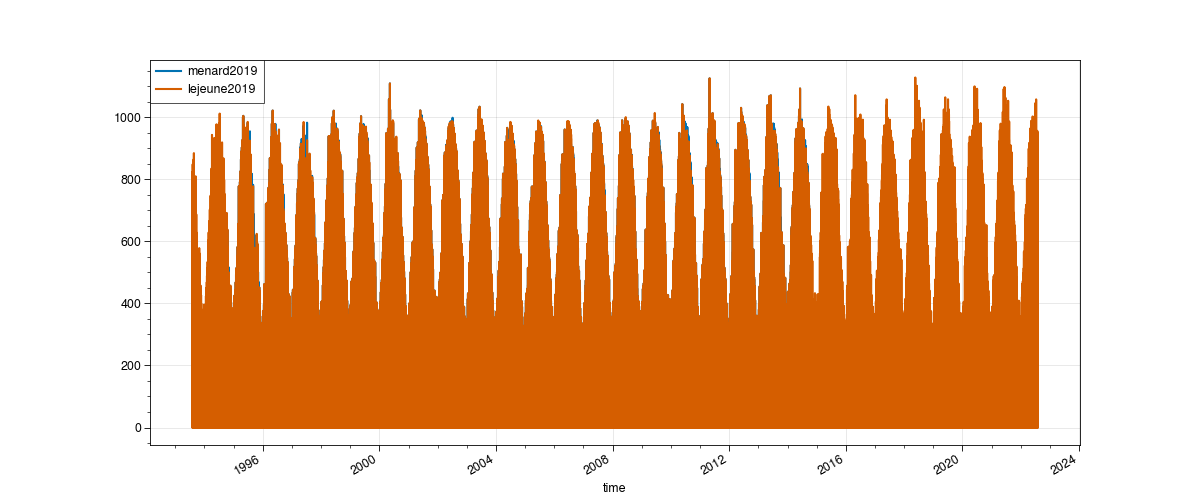

In [47]:
%matplotlib widget
plt.figure(figsize=(12,5))
# (ds_morin2012['DIR [W/m**2]']+ds_morin2012['DIF [W/m**2]']).plot(label='morin2012')
ds_menard2019.SWdown.plot(label='menard2019')
(ds_lejeune2019.SCA_SWdown+ds_lejeune2019.DIR_SWdown).plot(label='lejeune2019')
plt.legend()

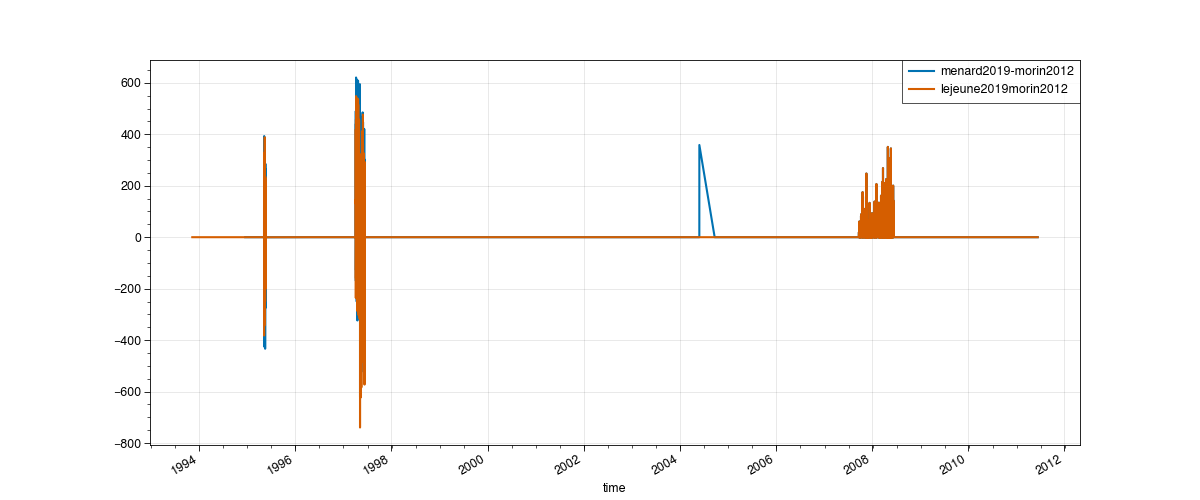

In [51]:
%matplotlib widget
plt.figure(figsize=(12,5))
ref = (ds_morin2012['DIR [W/m**2]']+ds_morin2012['DIF [W/m**2]'])
(ds_menard2019-ref).SWdown.plot(label='menard2019-morin2012')
((ds_lejeune2019.SCA_SWdown+ds_lejeune2019.DIR_SWdown)-ref).plot(label='lejeune2019-morin2012')
plt.legend()

### SWDown direct
- Morin = lejeune

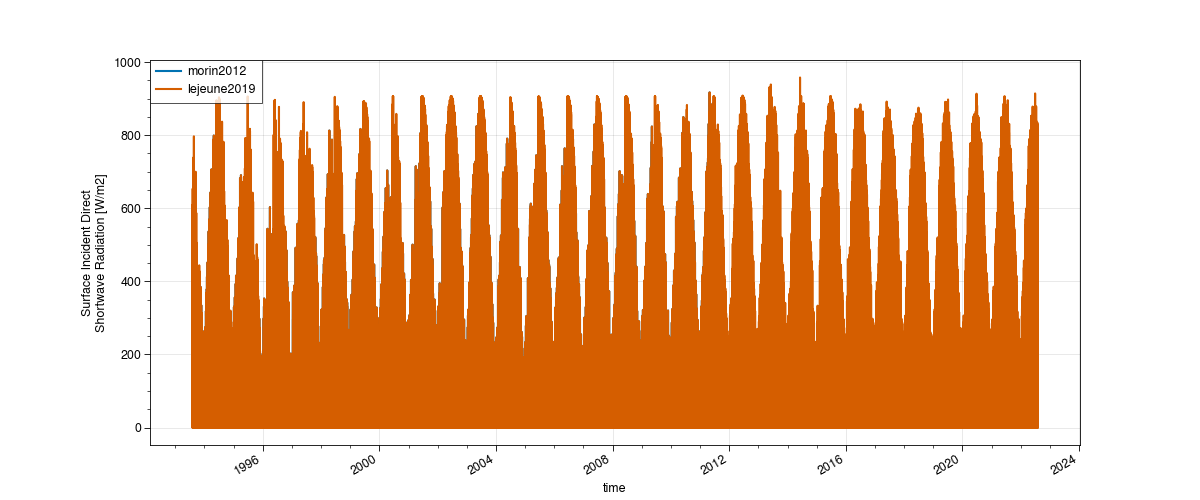

In [48]:
%matplotlib widget
plt.figure(figsize=(12,5))
ds_morin2012['DIR [W/m**2]'].plot(label='morin2012')
ds_lejeune2019.DIR_SWdown.plot(label='lejeune2019')
plt.legend()

### SWDown diffus
- Morin = lejeune sauf en 1995 et 1997 (diff de 400W)

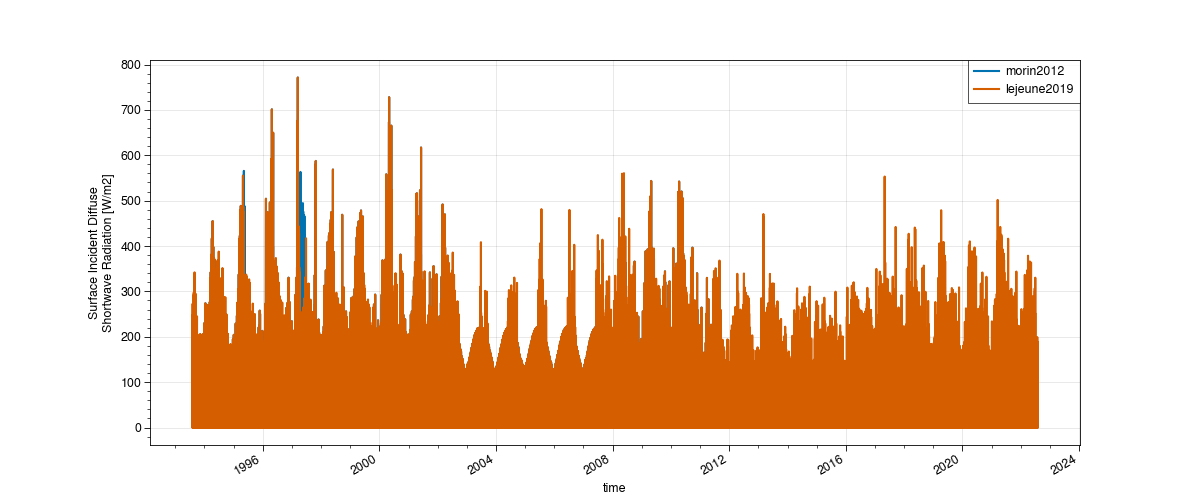

In [49]:
%matplotlib widget
plt.figure(figsize=(12,5))
ds_morin2012['DIF [W/m**2]'].plot(label='morin2012')
ds_lejeune2019.SCA_SWdown.plot(label='lejeune2019')
plt.legend()

### LWDown
- Menard = Lejeune à part en été 
- Morin + 10W en hiver sinon = lejeune en été
- après 2015 tous égaux
- tous égaux pendant la saison d'hiver sauf en 2003 1 pic

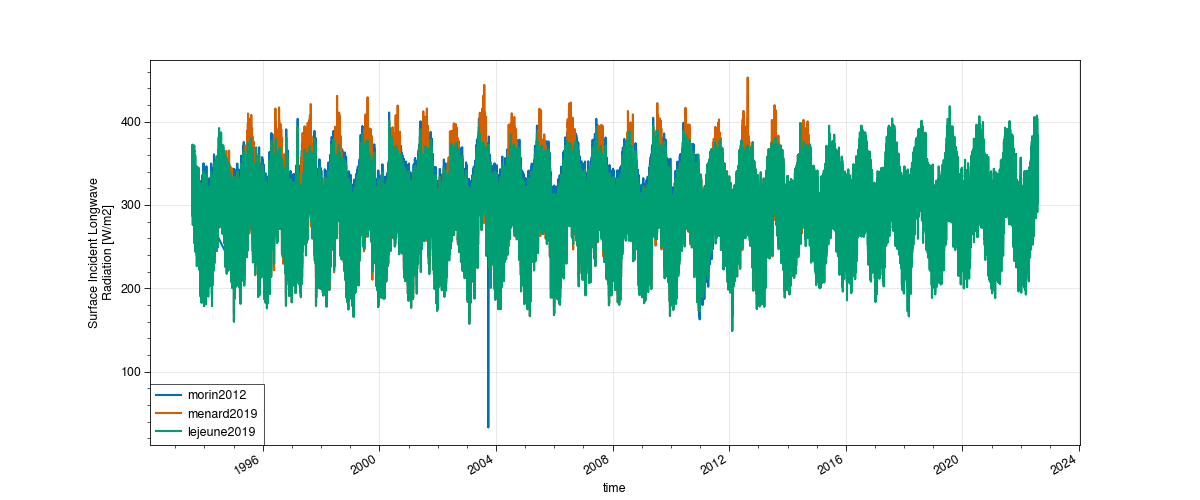

In [40]:
%matplotlib widget
plt.figure(figsize=(12,5))
ds_morin2012['LWD [W/m**2]'].plot(label='morin2012')
ds_menard2019.LWdown.plot(label='menard2019')
ds_lejeune2019.LWdown.plot(label='lejeune2019')
plt.legend()

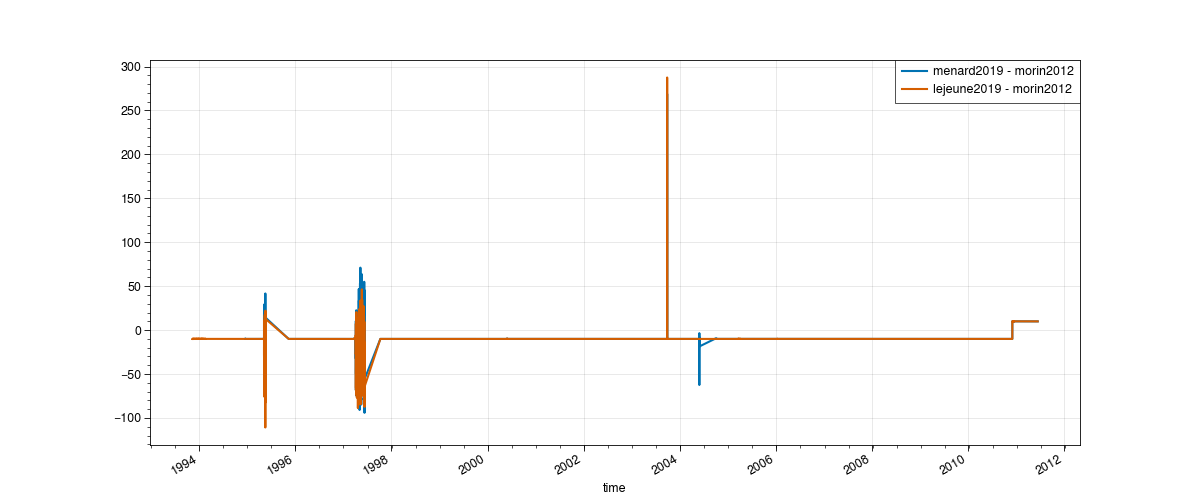

In [52]:
%matplotlib widget
plt.figure(figsize=(12,5))
ref = ds_morin2012['LWD [W/m**2]']
(ds_menard2019.LWdown - ref).plot(label='menard2019 - morin2012')
(ds_lejeune2019.LWdown - ref).plot(label='lejeune2019 - morin2012')
plt.legend()

### Snowf
- differences in summer again so ok

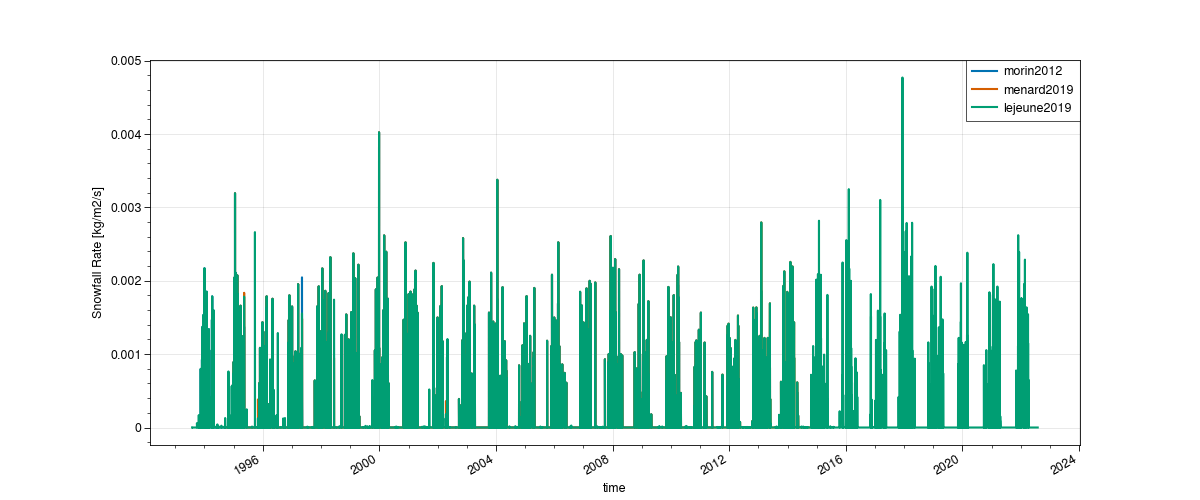

In [56]:
%matplotlib widget
plt.figure(figsize=(12,5))
ds_morin2012['Snow [kg/m**2/s]'].plot(label='morin2012')
ds_menard2019.Snowf.plot(label='menard2019')
ds_lejeune2019.Snowf.plot(label='lejeune2019')
plt.legend()

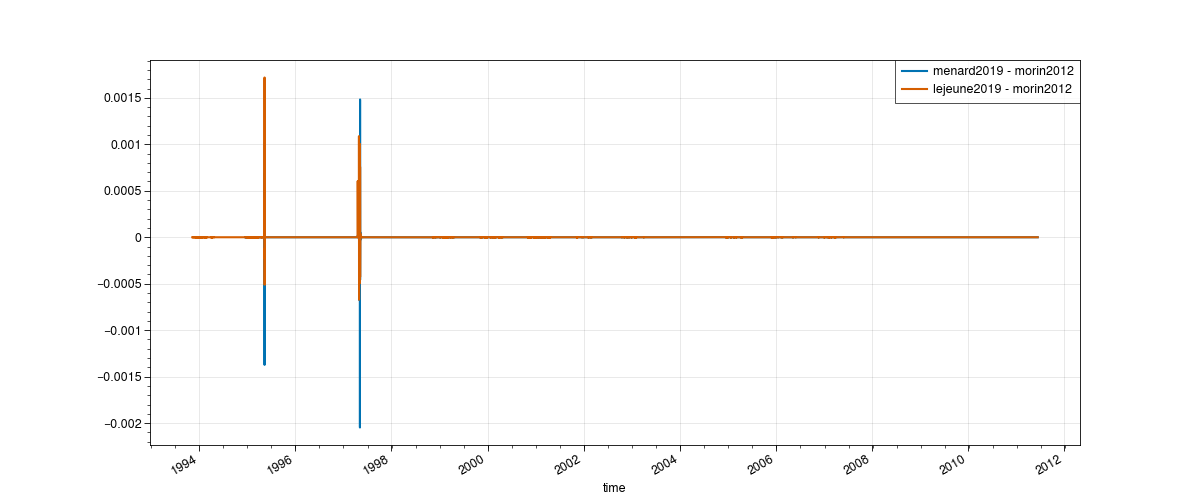

In [57]:
%matplotlib widget
plt.figure(figsize=(12,5))
ref = ds_morin2012['Snow [kg/m**2/s]']
(ds_menard2019.Snowf - ref).plot(label='menard2019 - morin2012')
(ds_lejeune2019.Snowf - ref).plot(label='lejeune2019 - morin2012')
plt.legend()